<p>
  <b>AI Lab: Deep Learning for Computer Vision</b><br>
  <b><a href="https://www.wqu.edu/">WorldQuant University</a></b>
</p>

<div class="alert alert-success" role="alert">
  <p>
    <center><b>Usage Guidelines</b></center>
  </p>
  <p>
    This file is licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International</a>.
  </p>
  <p>
    You <b>can</b>:
    <ul>
      <li><span style="color: green">✓</span> Download this file</li>
      <li><span style="color: green">✓</span> Post this file in public repositories</li>
    </ul>
    You <b>must always</b>:
    <ul>
      <li><span style="color: green">✓</span> Give credit to <a href="https://www.wqu.edu/">WorldQuant University</a> for the creation of this file</li>
      <li><span style="color: green">✓</span> Provide a <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">link to the license</a></li>
    </ul>
    You <b>cannot</b>:
    <ul>
      <li><span style="color: red">✗</span> Create derivatives or adaptations of this file</li>
      <li><span style="color: red">✗</span> Use this file for commercial purposes</li>
    </ul>
  </p>
  <p>
    Failure to follow these guidelines is a violation of your terms of service and could lead to your expulsion from WorldQuant University and the revocation your certificate.
  </p>
</div>

 # Exploring and preparing a video Dataset:

Let's first import the libraries we'll be using. We're using the same libraries we used in previous projects.

In [5]:
import subprocess
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import pytubefix
import torch
import torchvision
from IPython.display import Video
from pytubefix import YouTube
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms.functional import to_pil_image
from torchvision.utils import make_grid

We'll also print out library versions as well as the Python version. This makes our analysis reproducible for anyone who wants to review or reuse our work.

In [ ]:
print("torch version : ", torch.__version__)
print("pytube version : ", pytubefix.__version__)
print("torchvision version : ", torchvision.__version__)
print("cv2 version : ", cv2.__version__)

!python --version

### (I)Fetching YouTube Video Data

For this project, we'll use a video of an interview with an Indian Olympic boxer [Mary Kom](https://en.wikipedia.org/wiki/Mary_Kom). She's a legendary athlete with many achievements. Among others, she's the only boxer to ever win eight World Championship medals.

We'll load the video of her interview from YouTube. We want to put the video file in directory `"data"` which should be in the `"project4"` directory.

  # Video Directory:

**Task 4.2.1:** Create a variable for the video directory using `pathlib` syntax.

In [ ]:
project_dir = Path("project4")
data_dir = "data"
video_dir = ...

print(video_dir)

In [3]:
# removing the older folder if it is alreadyexist:
!rm_rf project4/data# removing the this directory with out asking confirmation

/bin/sh: 1: rm_rf: not found


In [6]:
project_dir=Path("project4")
data_dir="data"
video_dir=project_dir/data_dir
print(video_dir)# this is the directory were we are going to put the video next(youtube video)

project4/data


Next we'll need to specify the URL of the YouTube video and download the video. We decided to save the video under file name `video_name = "mary_kom.mp4"`.

In [7]:
video_name = "mary_kom.mp4"
video_url = "https://www.youtube.com/watch?v=XScnCdyVbIU"
yt = YouTube(video_url)

Because downloading from YouTube doesn't always work, we wrapped the code in a `try/except` block.

 # Downloading Video:

**Task 4.2.2:** Fill in the missing code in the `else` part of the `try/except` block below. If grabbing the YouTube stream worked, we want to download the video to directory `video_dir` using file name `video_name`. 

In [ ]:
# Define variables
video_url = "https://www.youtube.com/watch?v=XScnCdyVbIU"# link for the downloading from yt.
video_dir = project_dir/data_dir
video_name = "mary_kom.mp4"
from urllib.error import HTTPError
try:
    # Initialize YouTube object and get the highest resolution stream
    stream = yt.streams.get_highest_resolution()
except HTTPError:
    # In case YouTube download failed, download the video from cloud storage
    print("Downloading from Cloud storage... ")
    if not (video_dir / video_name).exists():
        video_dir.mkdir(parents=True, exist_ok=True)  # Create directory
        os.system(f"gcloud storage cp --no-clobber gs://wqu_cv_course_datasets/{video_name} {video_dir}")
else:
    print("Downloading from YouTube... ")
    stream.download(output_path=video_dir, filename=video_name)
        


<div class="alert alert-info" role="alert">
    <p><b>Changes with respect to the video</b></p>
<p>The instructor in the video is downloading the video directly from YouTube. We've since made changes to include the video as part of the project and spare you the download time.</p>
    <p>We've left the activity as a placeholder but you can skip it altogether.</p>
</div>

The video is already available in the following location:

In [10]:
!ls -l project4/data/

total 152324
-rw-r--r-- 1 root root 155978059 Dec 14 09:08 mary_kom.mp4


  # Video Path:

**Task 4.2.3:** Create a variable for the video file path using `pathlib` syntax.

In [11]:
# The following variables you've already defined will be helpful
print(video_dir)
print(video_name)

project4/data
mary_kom.mp4


In [ ]:
input_video = ...

print(input_video)

In [12]:
input_video=video_dir/video_name
print(input_video)# this is the path to the file(input video)

project4/data/mary_kom.mp4


Now let's take a peak of the video.

In [ ]:
# Display the video:this will display the video for the over 1 hour...
Video(input_video, width=400)

The video is quite long and we'll only need a small portion of it. In a previous project, we 
truncated a video with `ffmpeg`, a command line tool for video and audio editing. This time, let's create a Python function that can cut down the video!

  # Defining The Function:

**Task 4.2.4:** Fill in the missing code that defines the signature of the `cut_video` function. By looking at the function's doc string, you can see what the input parameters should be.

In [ ]:
def cut_video(..., ..., ..., ...):
    """
    Cuts a portion of the video.

    :parameter input_file: Path to the input video file.
    :parameter output_file: Path to the output video file.
    :parameter start_time: Start time of the cut in seconds or in `HH:MM:SS` format.
    :parameter duration: Duration of the cut in seconds or in `HH:MM:SS` format.
    """
    command = [
        "ffmpeg",
        "-ss",
        str(start_time),
        "-i",
        input_file,
        "-t",
        str(duration),
        "-c",
        "copy",
        output_file,
    ]
    subprocess.run(command)


cut_video?

In [16]:
def cut_video(input_file,output_file,start_time,duration):
    """
    cuts the portion fo the video.
    :parameter input_file:path to the input video file.
    :parameter output_file:path to output video file.
    :parameter start_time:start time of the cut in seconds or in 'HH:MM:SS' format.
    :parameter duration:Duration of the cut in seconds or in "HH:MM:SS" format
    """
    command=[
       "ffmpeg",
        "-ss",
        str(start_time),
        "-i",
        input_file,
        "-t",
        str(duration),
        "-c",
        "copy",
        output_file,
    ]
    subprocess.run(command)


cut_video?
    

Signature: cut_video(input_file, output_file, start_time, duration)
Docstring:
cuts the portion fo the video.
:parameter input_file:path to the input video file.
:parameter output_file:path to output video file.
:parameter start_time:start time of the cut in seconds or in 'HH:MM:SS' format.
:parameter duration:Duration of the cut in seconds or in "HH:MM:SS" format
File:      /tmp/ipykernel_19/1727911859.py
Type:      function

Before we use this function, we should first prepare the output video path where we want to save the shortened video (`output_file` parameter we need to pass to the function).

  # Output Path preparation:

**Task 4.2.5:** Create a variable for the output video file path using `pathlib` syntax. Let's call the file `"output.mp4"`. It should be in the same directory as our input video file.

In [ ]:
output_video_name = "output.mp4"

output_video = ...

print(output_video)

In [18]:
# looking the video dirL
print(video_dir)# the output_video must be the same directory with this

project4/data


In [21]:
output_video_name="output.mp4"
output_video=video_dir/output_video_name
print(output_video)# this the place were our output video is saved.

project4/data/output.mp4


# Calling the Cut_video function above by giving the exact argument

**Task 4.2.6:** Call the `cut_video` function using the `input_video` and `output_video` variables you defined in the previous tasks.

In [ ]:
start_time = "00:00:00"  # Start at 00 seconds
duration = "00:01:00"  # Cut 1 minute

# Call cut_video function


In [22]:
start_time="00:00:00"
duration="00:01:00"
# calling the cut_video function:
cut_video(input_video,output_video,start_time,du)

ffmpeg version 4.3.7-0+deb11u1 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 10 (Debian 10.2.1-6)
  configuration: --prefix=/usr --extra-version=0+deb11u1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab 

Well done! We should be able to display this shortened one minute video we created.

In [ ]:
# Display the video
Video(output_video, width=400)

In [ ]:
# we can delete long original video before like this:
input_video.unlink()# the original video removing

### (II)Exploring and Preparing the Data

Let's learn a bit more about our video data. We're curious about things like the frame rate, total frame count, and frame shape. To get this information, we'll use the `opencv-python` library just like in the previous project (`cv2` which we imported at the top of the notebook).

The first step is to create a video capture using `cv2.VideoCapture` and pass in the path to our video.

  # video Capturing:

**Task 4.2.7:** Create a video capture for the one minute video we're working with. The rest of the code computes the frame rate and total frame count.

In [ ]:
video_capture = ...

if not video_capture.isOpened():
    print("Error: Could not open video.")
else:
    frame_rate = video_capture.get(cv2.CAP_PROP_FPS)
    frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Frame rate: {frame_rate}")
    print(f"Total number of frames: {frame_count}")

In [26]:
video_capture=cv2.VideoCapture(output_video)
if not video_capture.isOpened():
    print("Error: could not open video.")
else:
    frame_rate=video_capture.get(cv2.CAP_PROP_FPS)#FPS frame per second and CA_prop camera property
    frame_count=int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"frame rate:{frame_rate}")
    print(f"Total number of frame:{frame_count}")

frame rate:25.0
Total number of frame:1501


# NB:

Now let's display the first frame. We can fetch the first frame of our video capture by calling the `read()` method on it.

  # Fetching Frame(images)

**Task 4.2.8:** Use the video capture variable you defined in the previous task and fetch the first frame. The rest of the code will display the frame.

In [ ]:
ret, first_frame = ...

if ret:
    plt.imshow(cv2.cvtColor(first_frame, cv2.COLOR_BGR2RGB))
    plt.title("First Frame")
    plt.axis("off")
    plt.show()
else:
    print("Error: Could not read frame.")

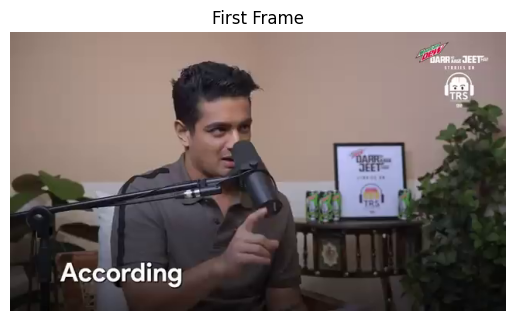

In [28]:
ret,first_frame=video_capture.read()
if ret:
    plt.imshow(cv2.cvtColor(first_frame,cv2.COLOR_BGR2RGB))
    plt.title("First Frame")
    plt.axis("off")
    plt.show()
else:
    print("Error:Could not read frame")


**Task 4.2.9:** Get the shape of the frame and the number of channels by calling the `shape` attribute on the `first_frame` variable.

In [ ]:
height, width, channel = ...

print("frames height : ", height)
print("frames width : ", width)
print("frames channel : ", channel)

In [30]:
# for task above:
height,width,channel=first_frame.shape
print("frames height: ",height)
print("frames width : ",width)
print("frames channel : ",channel)

frames height:  360
frames width :  640
frames channel :  3


The next thing we need to do is extract the individual frames from the video. 

  # Frames Directory:

**Task 4.2.10:** Create a directory path for the extracted frames using the `pathlib` syntax. This path should be a directory called `extracted_frames` which should be in `video_dir`.

In [ ]:
frames_dir = ...

frames_dir.mkdir(exist_ok=True)
print(frames_dir)

In [33]:
# loking the video_dir:
print(video_dir)

project4/data


In [35]:
frames_dir=video_dir/"extracted_frames"
frames_dir.mkdir(exist_ok=True)
print(frames_dir)

project4/data/extracted_frames


  # Saving Frames:

**Task 4.2.11:** Fill in the missing code below that saves every fifth frame from the video. 

In [ ]:
interval = frame_rate * 0.20  # Extract every fifth frame from the video
frame_count = 0

print("Start extracting individual frames...")
while True:
    # read next frame from the video_capture
    ret, frame = ...
    if not ret:
        print("Finished!")
        break  # Break the loop if there are no more frames

    # Save frames at every 'interval' frames
    if frame_count % ... == 0:
        frame_path = frames_dir / f"frame_{frame_count}.jpg"
        cv2.imwrite(frame_path, frame)

    frame_count += 1

video_capture.release()

In [36]:
interval = frame_rate * 0.20  # Extract every fifth frame from the video:at 0.20*25=5 interval
frame_count = 0

print("Start extracting individual frames...")
while True:
    # read next frame from the video_capture
    ret, frame = video_capture.read()
    if not ret:# if nothing is left in video frame
        print("Finished!")
        break  # Break the loop if there are no more frames

    # Save frames at every 'interval' frames
    if frame_count % interval == 0:# if the interval is divided by 2 at every 5 th inerval
        frame_path = frames_dir / f"frame_{frame_count}.jpg"
        cv2.imwrite(frame_path, frame)

    frame_count += 1

video_capture.release()

Start extracting individual frames...
Finished!


# the above is saved under project4/data directory as extracted_frames in this check it!!

**Task 4.2.12:** Compute the number of frames we've extracted by using `iterdir()` method on the `frames_dir` path. That'll give you a generator that you need to covert to `list` before using`len`. 

In [ ]:
n_extraced_frames = ...

print(f"We saved {n_extraced_frames} frames.")

In [40]:
frames_dir.iterdir()

<generator object Path.iterdir at 0x74127dc3dd20>

In [38]:
# Answer for the task:
n_extraced_frames = len(list(frames_dir.iterdir()))

print(f"We saved {n_extraced_frames} frames.")

We saved 300 frames.


To conclude this lesson, let's display some sample frames that we extracted. The function `display_sample_images` below that'll display a grid of sample frames is the same as the one we used in the previous project.

 # Displaying The function:

**Task 4.2.13:** Fill in the missing code in `display_sample_images` function.

In [ ]:
def display_sample_images(dir_path, sample=5):
    image_list = []
    images = sorted(dir_path.iterdir())
    if images:
        sample_images = images[:sample]
        for sample_image in sample_images:
            image = read_image(str(sample_image))
            
            # Define resizing transformation that resizes to 240 x 240
            resize_transform = ...
            # Resize image by using `resize_transform`
            image = ...
            image_list.append(image)
    grid = make_grid(image_list, nrow=5)
    image = to_pil_image(grid)
    return image


display_sample_images?

In [47]:
def display_sample_images(dir_path,sample=5):
    images_list=[]
    images=sorted(dir_path.iterdir())
    if images:
        sample_images=images[:sample]
        for sample_image in sample_images:
            image=read_image(str(sample_image))
            # define resizing transformation that resizes to 240*240
            resize_transfrom=transforms.Resize((240,240))
            # resize image by using 'resize_transform'
            image=resize_transfrom(image)
            images_list.append(image)
        grid=make_grid(images_list,nrow=5)
        return image
display_sample_images?
        



Signature: display_sample_images(dir_path, sample=5)
Docstring: <no docstring>
File:      /tmp/ipykernel_19/4019244956.py
Type:      function

In [54]:
def display_sample_images(dir_path, sample=5):
    image_list = []
    images = sorted(dir_path.iterdir())
    if images:
        sample_images = images[:sample]
        for sample_image in sample_images:
            image = read_image(str(sample_image))
            
            # Define resizing transformation that resizes to 240 x 240
            resize_transform =transforms.Resize((240,240))
            # Resize image by using `resize_transform`
            image = resize_transform(image)
            image_list.append(image)
    grid = make_grid(image_list, nrow=5)
    image = to_pil_image(grid)
    return image


display_sample_images?

Signature: display_sample_images(dir_path, sample=5)
Docstring: <no docstring>
File:      /tmp/ipykernel_19/717351260.py
Type:      function

# Displaying The function:

**Task 4.2.14:** Use `display_sample_images` function to display 20 of the frames that we extracted.

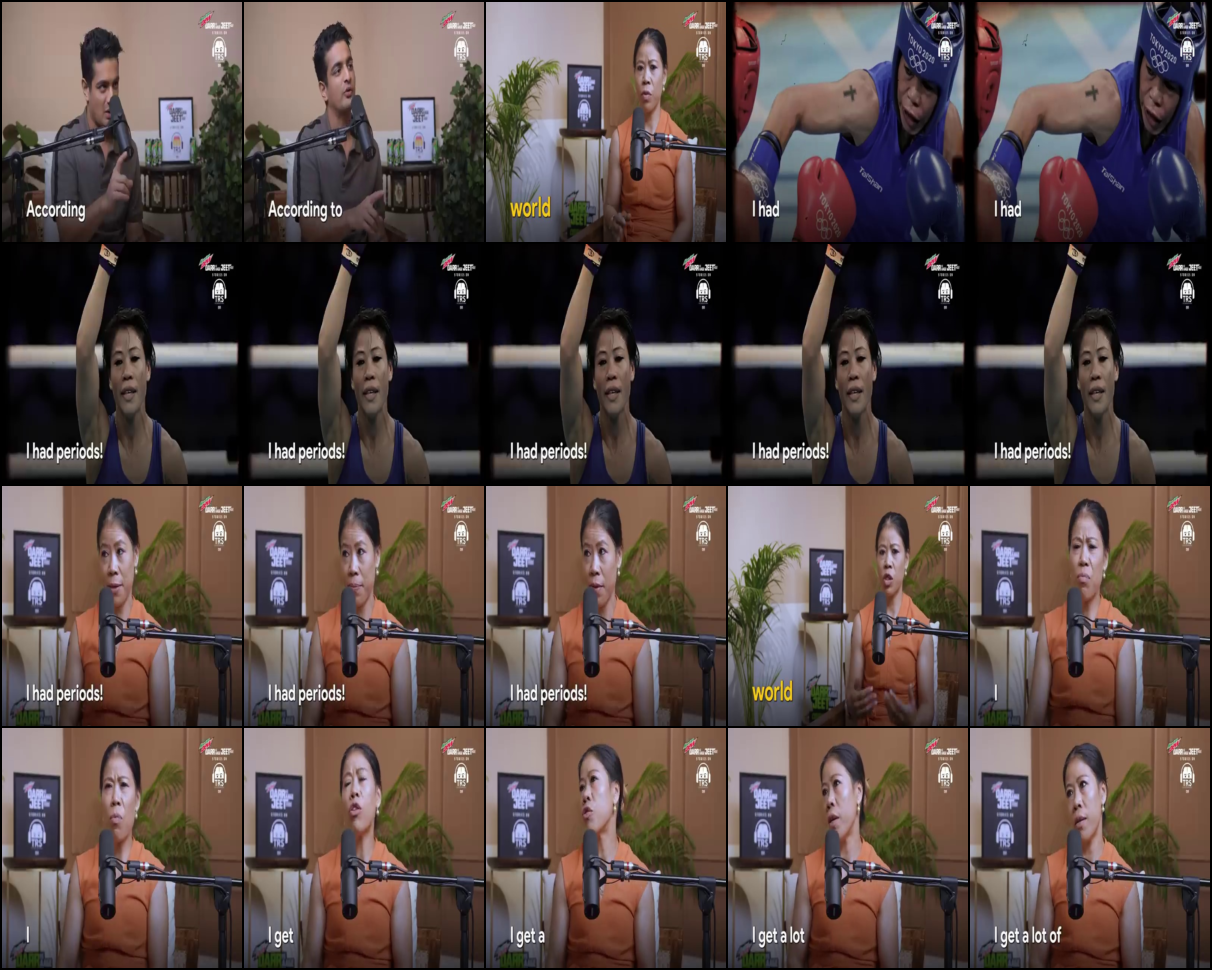

In [55]:
# Call function `display_sample_images` on `frames_dir`
display_sample_images(frames_dir,sample=20)

 # Conclusion:

---
This file &#169; 2024 by [WorldQuant University](https://www.wqu.edu/) is licensed under [CC BY-NC-ND 4.0](https://creativecommons.org/licenses/by-nc-nd/4.0/).